#Portfolio Project 1

In this portfolio project, I performed sales analytics for an e-commerce store. The first step was connecting to the database in BigQuery. Then, I created a dataset by writing a Python query that joins the available database tables. The dataset includes all orders and sessions, even for users who did not register on the site. I carefully selected the appropriate join types to ensure that no relevant data was lost, especially since registered users are few.

##Preparing data

###Database Connection. Installation of Methods in Python

In [ ]:
!pip install --upgrade google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Creating a dataset based on tables available in the database

In [ ]:
auth.authenticate_user()
client = bigquery.Client(project="data-analytics-mate")

In [ ]:
query = """
SELECT
  date,
  s.ga_session_id AS session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  CASE
    WHEN sp.language LIKE 'en%' THEN 'English'
    WHEN sp.language LIKE 'es%' THEN 'Spanish'
    WHEN sp.language LIKE 'zh%' THEN 'Chinese'
    WHEN sp.language LIKE 'de%' THEN 'German'
    WHEN sp.language LIKE 'fr%' THEN 'French'
    WHEN sp.language LIKE 'ko%' THEN 'Korean'
    ELSE sp.language
  END AS language,
  sp.medium,
  sp.channel,
  a.id AS id_account,
  a.is_verified,
  a.is_unsubscribed,
  p.category,
  p.name,
  p.price,
  p.short_description
FROM
  `data-analytics-mate.DA.session` AS s
LEFT JOIN
  `data-analytics-mate.DA.order` AS o
ON
  s.ga_session_id = o.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.session_params` AS sp
ON
  s.ga_session_id = sp.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account_session` AS acs
ON
  s.ga_session_id = acs.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account` AS a
ON
  acs.account_id = a.id
LEFT JOIN
  `data-analytics-mate.DA.product` AS p
ON
  o.item_id = p.item_id
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

##Short description of the resulting dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   session_id         349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   medium             349545 non-null  object 
 10  channel            349545 non-null  object 
 11  id_account         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  name               33538 non-null   object 
 16  pr

* **Total number of columns:** 18 columns
* **Number of numeric columns** (and which ones): 5 columns (session_id, id_account, is_verified, is_unsubscribed, price)
* **Number of categorical columns** (and which ones): 12 columns (continent, country, device, browser, mobile_model_name, operating_system, language, medium, channel, category, name, short_description)
* **Number of datetime columns:** 1 column

###Unique sessions count

In [ ]:
unique_sessions = df["session_id"].nunique()
print(f"Unique sessions count: {unique_sessions}")

Unique sessions count: 349545


###Period of sales - what time period is considered

In [ ]:
start_date = df["date"].min()
end_date = df["date"].max()

print(f"Period: from {start_date} to {end_date}")

Period: from 2020-11-01 to 2021-01-31


###Missing values

In [ ]:
df.isna().sum()

,0
date,0
session_id,0
continent,0
country,0
device,0
browser,0
mobile_model_name,0
operating_system,0
language,114266
medium,0


We have 114,266 missing values in "language" column. This is because some users do not provide information about their language.

We also have 321,600 missing values in the id_account, is_verified, and is_unsubscribed columns. This is because our dataset includes all sessions and orders, even those made by users who did not register on the site.

Additionally, there are missing values in the category, name, price, and short_description columns. The reason is the same as above — our dataset includes all sessions and orders, even those made by users who did not register on the site.

##Overview of Key Business Metrics and Sales Analysis by Regions, Categories, Devices, and User Behavior

###Top 3 Continents and Top 5 Countries by Sales Volume and Number of Orders

In [ ]:
continent_by_sales_volume = df.groupby("continent")["price"].sum().sort_values(ascending=False).head(3)
print("Top 3 Continents by Sales Volume:")
print(continent_by_sales_volume)

Top 3 Continents by Sales Volume:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64


In [ ]:
continent_by_number_of_orders = df.groupby("continent")["name"].count().sort_values(ascending=False).head(3)
print("Top 3 Continents by Numbers of Orders:")
print(continent_by_number_of_orders)

Top 3 Continents by Numbers of Orders:
continent
Americas    18553
Asia         7950
Europe       6261
Name: name, dtype: int64


In [ ]:
country_by_sales_volume = df.groupby("country")["price"].sum().sort_values(ascending=False).head(5)
print("Top 5 Countries by Sales Volume:")
print(country_by_sales_volume)

Top 5 Countries by Sales Volume:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64


In [ ]:
country_by_number_of_orders = df.groupby("country")["name"].count().sort_values(ascending=False).head(5)
print("Top 5 Country by Numbers of Orders:")
print(country_by_number_of_orders)

Top 5 Country by Numbers of Orders:
country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Name: name, dtype: int64


###Top 10 Product Categories by Total Sales Amount

In [ ]:
categories_by_total_sales = pd.pivot_table(df, values="price", index="category", aggfunc="sum").sort_values(by="price", ascending=False).head(10)
print(categories_by_total_sales)

                                      price
category                                   
Sofas & armchairs                 8388254.5
Chairs                            6147748.8
Beds                              4919725.0
Bookcases & shelving units        3640818.1
Cabinets & cupboards              2336499.5
Outdoor furniture                 2142222.2
Tables & desks                    1790307.5
Chests of drawers & drawer units   906562.5
Bar furniture                      735503.0
Children's furniture               467697.0


###Top 10 Product Categories in the Country with Highest Sales Compared to Overall Performance

In [ ]:
US_top_categories_by_total_sales = pd.pivot_table(df[df["country"].str.contains("United States")], values="price", index="category", aggfunc="sum").sort_values(by="price", ascending=False).head(10)
print(US_top_categories_by_total_sales)

                                      price
category                                   
Sofas & armchairs                 3707144.5
Chairs                            2619773.8
Beds                              2213058.0
Bookcases & shelving units        1567606.9
Cabinets & cupboards               994545.5
Outdoor furniture                  929245.2
Tables & desks                     777865.0
Chests of drawers & drawer units   382388.0
Bar furniture                      330805.0
Children's furniture               207575.0


There is no difference between the Top 10 Product Categories in the Country with Highest Sales (US) Compared to Overall Performance

###Sales Analysis by Device Types and Models (as % of Total Sales)

In [ ]:
browsers = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']
df_devices = df[~df['mobile_model_name'].isin(browsers)]

grouped_by_device = df_devices.groupby(["device", "mobile_model_name"])["price"].sum().sort_values(ascending=False).reset_index()
grouped_by_device.rename(columns={"price": "sales_sum"}, inplace=True)

#Total Sales
total_sales = grouped_by_device["sales_sum"].sum()

#% of Total Sales
percent_of_total_sales = round((grouped_by_device["sales_sum"] / total_sales * 100), 2)
grouped_by_device["percent_of_total_sales"] = percent_of_total_sales

print(grouped_by_device)

    device mobile_model_name  sales_sum  percent_of_total_sales
0   mobile            iPhone  6420776.3                   41.52
1   mobile           <Other>  5735073.6                   37.09
2  desktop        ChromeBook  1830458.7                   11.84
3  desktop           <Other>   525645.1                    3.40
4   tablet              iPad   448854.2                    2.90
5   tablet           <Other>   274612.1                    1.78
6   mobile        Pixel 4 XL   118287.7                    0.76
7   mobile           Pixel 3   109148.2                    0.71


In [ ]:
browsers = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']
df_devices = df[~df['mobile_model_name'].isin(browsers)]

grouped_by_device_num_ord = df_devices.groupby(["device", "mobile_model_name"])["session_id"].count().sort_values(ascending=False).reset_index()
grouped_by_device_num_ord.rename(columns={"session_id": "number_of_session"}, inplace=True)

#Total Number of Session
total_num_of_ord = grouped_by_device_num_ord["number_of_session"].sum()

#% of Total Number of Session
percent_of_total_ord = round((grouped_by_device_num_ord["number_of_session"] / total_num_of_ord * 100), 2)
grouped_by_device_num_ord["percent_of_total_session"] = percent_of_total_ord

print(grouped_by_device_num_ord)

    device mobile_model_name  number_of_session  percent_of_total_session
0   mobile            iPhone              71326                      42.3
1   mobile           <Other>              63635                     37.74
2  desktop        ChromeBook              19084                     11.32
3   tablet              iPad               5090                      3.02
4  desktop           <Other>               4445                      2.64
5   tablet           <Other>               2759                      1.64
6   mobile        Pixel 4 XL               1246                      0.74
7   mobile           Pixel 3               1034                      0.61


The most profitable users for the store are those who make purchases using iPhones and other phone models, as well as users who use Chromebooks.

###Sales Analysis by Traffic Sources (as % of Total Sales)

In [ ]:
grouped_by_channel = df.groupby("channel")["price"].sum().sort_values(ascending=False).reset_index()
grouped_by_channel.rename(columns={"price": "sales_sum"}, inplace=True)

#Total Sales
total_sales_by_channel = grouped_by_channel["sales_sum"].sum()

#% of Total Sales
percent_of_total_sales_by_channel = round((grouped_by_channel["sales_sum"] / total_sales_by_channel * 100), 2)
grouped_by_channel["percent_of_total_sales"] = percent_of_total_sales_by_channel

print(grouped_by_channel)

          channel   sales_sum  percent_of_total_sales
0  Organic Search  11433151.6                   35.76
1     Paid Search   8511049.4                   26.62
2          Direct   7494923.4                   23.44
3   Social Search   2532105.7                    7.92
4       Undefined   2000501.0                    6.26


In [ ]:
grouped_by_channel_ord = df.groupby("channel")["session_id"].count().sort_values(ascending=False).reset_index()
grouped_by_channel_ord.rename(columns={"session_id": "number_of_session"}, inplace=True)

#Total Number of Session
total_sales_by_channel_ord = grouped_by_channel_ord["number_of_session"].sum()

#% of Total Number of Session
percent_of_total_sales_by_channel = round((grouped_by_channel_ord["number_of_session"] / total_sales_by_channel_ord * 100), 2)
grouped_by_channel_ord["percent_of_total_session"] = percent_of_total_sales_by_channel

print(grouped_by_channel_ord)

          channel  number_of_session  percent_of_total_session
0  Organic Search             124425                      35.6
1     Paid Search              94341                     26.99
2          Direct              81382                     23.28
3   Social Search              27914                      7.99
4       Undefined              21483                      6.15


In [ ]:
number_of_users_by_channel = df.groupby("channel")["id_account"].count().sort_values(ascending=False).reset_index()
number_of_users_by_channel.rename(columns={"id_account": "number_of_users"}, inplace=True)

#Total Sales
total_users_by_channel = number_of_users_by_channel["number_of_users"].sum()

#% of Total Sales
percent_of_users_by_channel = round((number_of_users_by_channel["number_of_users"] / total_users_by_channel * 100), 2)
number_of_users_by_channel["percent_of_total_users"] = percent_of_users_by_channel

print(number_of_users_by_channel)

          channel  number_of_users  percent_of_total_users
0  Organic Search            10035                   35.91
1     Paid Search             7467                   26.72
2          Direct             6514                   23.31
3   Social Search             2212                    7.92
4       Undefined             1717                    6.14


We see that in all three categories—total revenue, number of sessions, and number of users—we have the same results. The top 3 most profitable channels are Organic Search, Paid Search, and Direct Channel.

###Percentage of Registered Users Who Confirmed Their Email Address

In [ ]:
number_of_acc = df["id_account"].nunique()
number_of_verified_acc = df["is_verified"].sum()
percent_of_total_acc = round((number_of_verified_acc / number_of_acc * 100), 2)

print(f"Total number of unique account: {number_of_acc} \nTotal number of verified account: {number_of_verified_acc} \nPercentage of Registered Users Who Confirmed Their Email Address: {percent_of_total_acc}%")

Total number of unique account: 27945 
Total number of verified account: 20036 
Percentage of Registered Users Who Confirmed Their Email Address: 71.7%


###Percentage of Registered Users Who Unsubscribed from the Newsletter

In [ ]:
number_of_acc = df["id_account"].nunique()
number_of_unsubscribed_acc = df["is_unsubscribed"].sum()
percent_of_total_acc = round((number_of_unsubscribed_acc / number_of_acc * 100), 2)

print(f"Total number of unique account: {number_of_acc} \nTotal number of unsubscribed account: {number_of_unsubscribed_acc} \nPercentage of Registered Users Who Unsubscribed from the Newsletter: {percent_of_total_acc}%")

Total number of unique account: 27945 
Total number of unsubscribed account: 4735 
Percentage of Registered Users Who Unsubscribed from the Newsletter: 16.94%


###Comparison of Sales Behavior Between Subscribed and Unsubscribed Users

In [ ]:
grouped_by_subscription = df.groupby("is_unsubscribed")["price"].sum().sort_values(ascending=False)
grouped_by_subscription.rename(index={0: "Subscribed Users", 1: "Unsubscribed Users"}, inplace=True)

print("Total Sales for Subscribed and Unsubscribed Users:\n\n", grouped_by_subscription)

Total Sales for Subscribed and Unsubscribed Users:

 is_unsubscribed
Subscribed Users      2150796.9
Unsubscribed Users     431721.6
Name: price, dtype: float64


In [ ]:
median_sales_by_subscription = df.groupby("is_unsubscribed")["price"].median().sort_values(ascending=False)
median_sales_by_subscription.rename(index={0: "Subscribed Users", 1: "Unsubscribed Users"}, inplace=True)

print("Median Sales for Subscribed and Unsubscribed Users:\n\n", median_sales_by_subscription)

Median Sales for Subscribed and Unsubscribed Users:

 is_unsubscribed
Unsubscribed Users    450.0
Subscribed Users      395.0
Name: price, dtype: float64


In [ ]:
mean_sales_by_subscription = round((df.groupby("is_unsubscribed")["price"].mean().sort_values(ascending=False)), 2)
mean_sales_by_subscription.rename(index={0: "Subscribed Users", 1: "Unsubscribed Users"}, inplace=True)

print("Mean Sales for Subscribed and Unsubscribed Users:\n\n",mean_sales_by_subscription)

Mean Sales for Subscribed and Unsubscribed Users:

 is_unsubscribed
Unsubscribed Users    965.82
Subscribed Users      921.51
Name: price, dtype: float64


As we can see, registered users generally bring more revenue. However, the average and median check amounts among unregistered users are higher.

###Top 10 Countries with the Highest Number of Registered Users

In [ ]:
country_by_number_of_registred_users = df.groupby("country")["id_account"].count().sort_values(ascending=False).head(10).reset_index()
country_by_number_of_registred_users.columns = ["Country", "Number of Registered Users"]

print(country_by_number_of_registred_users)

          Country  Number of Registered Users
0   United States                       12384
1           India                        2687
2          Canada                        2067
3  United Kingdom                         859
4          France                         553
5           Spain                         536
6          Taiwan                         500
7           China                         490
8         Germany                         490
9           Italy                         386


###Comparison of User Behavior by Language

In [ ]:
grouped_by_languages = df.groupby("language")["price"].sum().sort_values(ascending=False).reset_index()
print(grouped_by_languages)

  language       price
0  English  18671574.0
1  Chinese   1053040.6
2   French    579024.5
3  Spanish    514573.1
4   Korean    298528.8
5   German    257088.7


In [ ]:
grouped_by_languages = df.groupby("language")["session_id"].count().sort_values(ascending=False).reset_index()
print(grouped_by_languages)

  language  session_id
0  English      205517
1  Chinese       12222
2  Spanish        5760
3   French        5652
4   German        3387
5   Korean        2741


In [ ]:
pivot_table_lang = pd.pivot_table(df, values="price", index="category", columns="language", aggfunc="sum").head(5)
print(pivot_table_lang)

language                     Chinese    English    French   German   Korean  \
category                                                                      
Bar furniture                24269.0   430680.0    9413.0   6507.0   3073.0   
Beds                        140256.0  2900963.0  117553.5  27028.0  63765.0   
Bookcases & shelving units  137595.8  2134370.9   61859.1  53369.3  33468.8   
Cabinets & cupboards         65165.5  1319425.5   55206.0  13272.0  14366.0   
Café furniture                7231.0    81193.0    2390.0    919.0    145.0   

language                    Spanish  
category                             
Bar furniture               12166.0  
Beds                        45410.5  
Bookcases & shelving units  59333.8  
Cabinets & cupboards        36138.0  
Café furniture               2079.0  


In [ ]:
grouped_by_lang_mean_sales = round((df.groupby("language")["price"].mean().sort_values(ascending=False).reset_index()), 2)
print(grouped_by_lang_mean_sales)

  language    price
0   Korean  1097.53
1   French  1039.54
2  English   950.50
3  Spanish   935.59
4  Chinese   874.62
5   German   845.69


In [ ]:
grouped_by_lang_median_sales = round((df.groupby("language")["price"].median().sort_values(ascending=False).reset_index()), 2)
print(grouped_by_lang_median_sales)

  language  price
0   Korean  547.5
1   French  475.0
2  Chinese  458.0
3  English  445.0
4  Spanish  445.0
5   German  395.0


The highest number of sessions and the most profitable language for purchases is English. However, the highest average and median check amounts are made by users of the Korean language. This indicates that Koreans, for example, make fewer sessions but typically purchase larger amounts.

##Sales Dynamics Analysis

###Total Sales by Date: Visualization of Overall Sales Dynamics

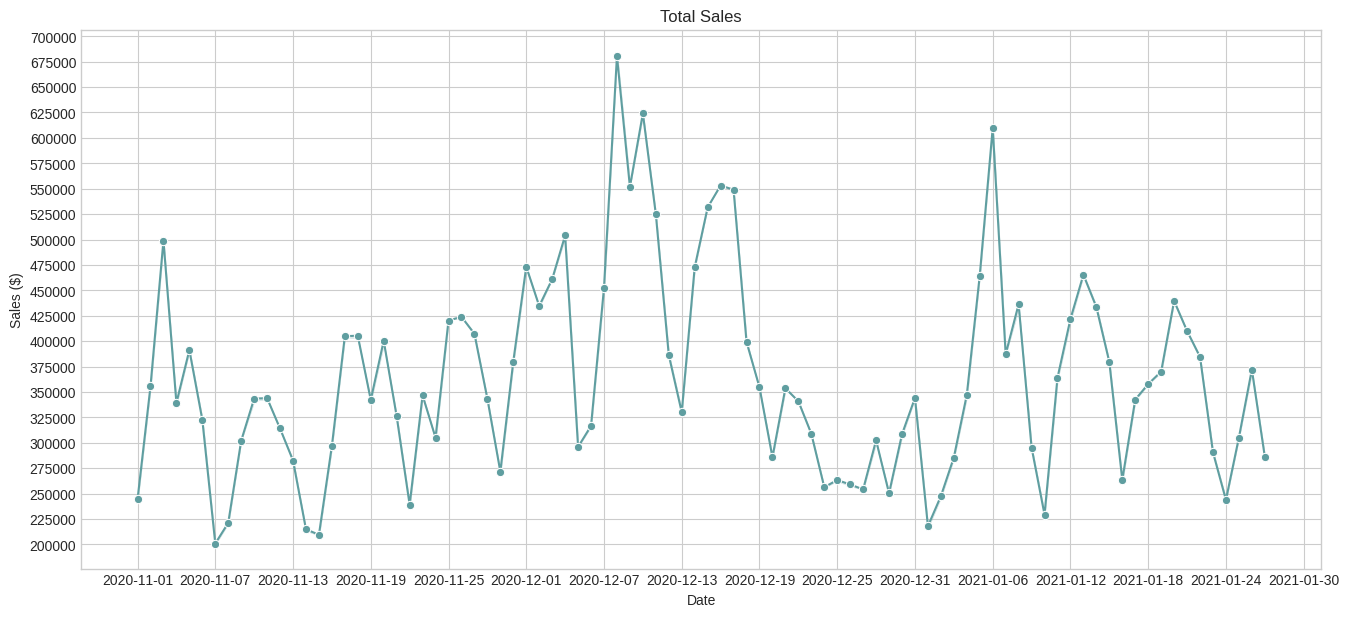

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(16, 7))
sns.lineplot(data=df, x="date",
             y="price",
             estimator="sum",
             errorbar=('ci', False),
             marker="o",
             color="cadetblue")

x_ticks = np.arange(df["date"].min(), df["date"].max(), 6)
plt.xticks(x_ticks)

y_ticks = np.arange(200000, plt.gca().get_ylim()[1] + 5, 25000)
plt.yticks(y_ticks)

plt.title("Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales ($)")

plt.show()

From previous calculations, we know that our sample size is not large (we have the period from 2020-11-01 to 2021-01-31). Therefore, our seasonality is observed only during the Christmas holiday period — sales increase before the holidays and drop during the holidays themselves. The same situation occurs before the New Year.

###Sales Dynamics in America, Asia, and Europe

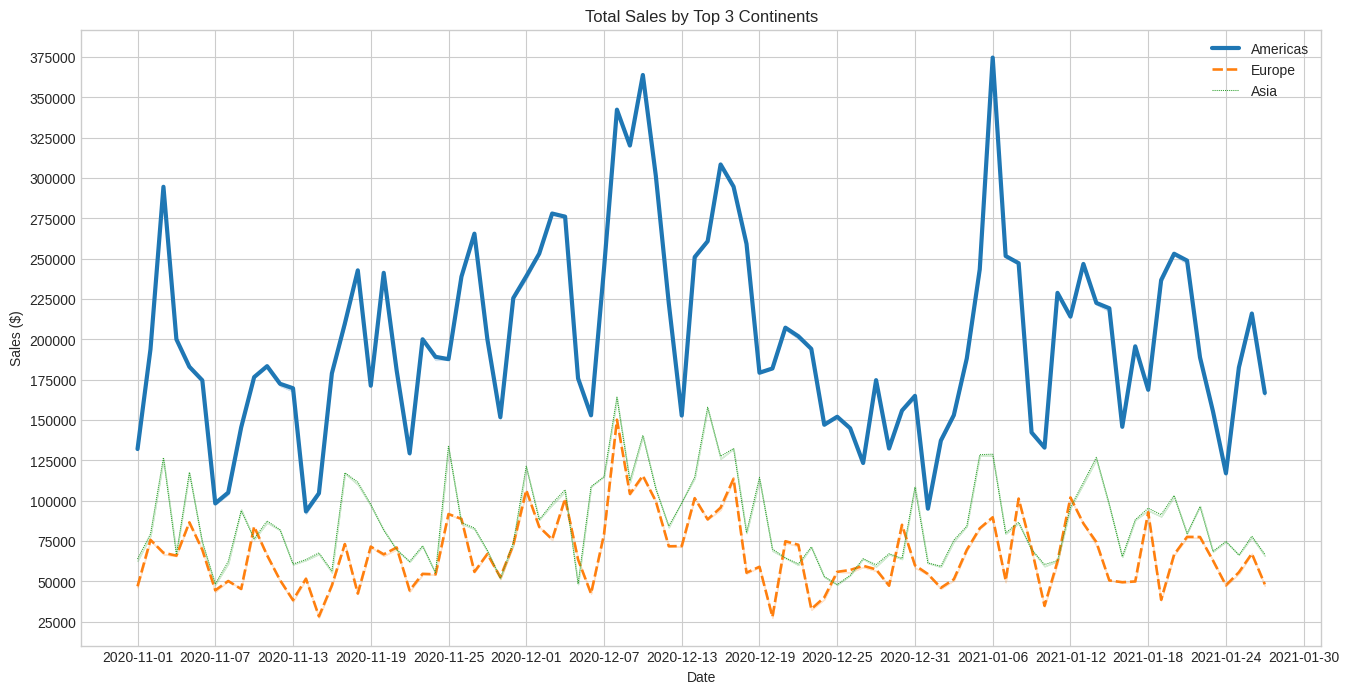

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(16, 8))

countinents = ["Americas", "Asia", "Europe"]
df_filtered = df[df["continent"].isin(countinents)]
sns.lineplot(data=df_filtered, x="date",
             y="price",
             estimator="sum",
             hue="continent",
             errorbar=('ci', False),
             size="continent",
             style="continent")

x_ticks = np.arange(df["date"].min(), df["date"].max(), 6)
plt.xticks(x_ticks)

y_ticks = np.arange(25000, plt.gca().get_ylim()[1] + 5, 25000)
plt.yticks(y_ticks)

plt.title("Total Sales by Top 3 Continents")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

In the context of America, Asia, and Europe, we observe similar seasonality as in overall sales.

###Sales Dynamics by Traffic Channels

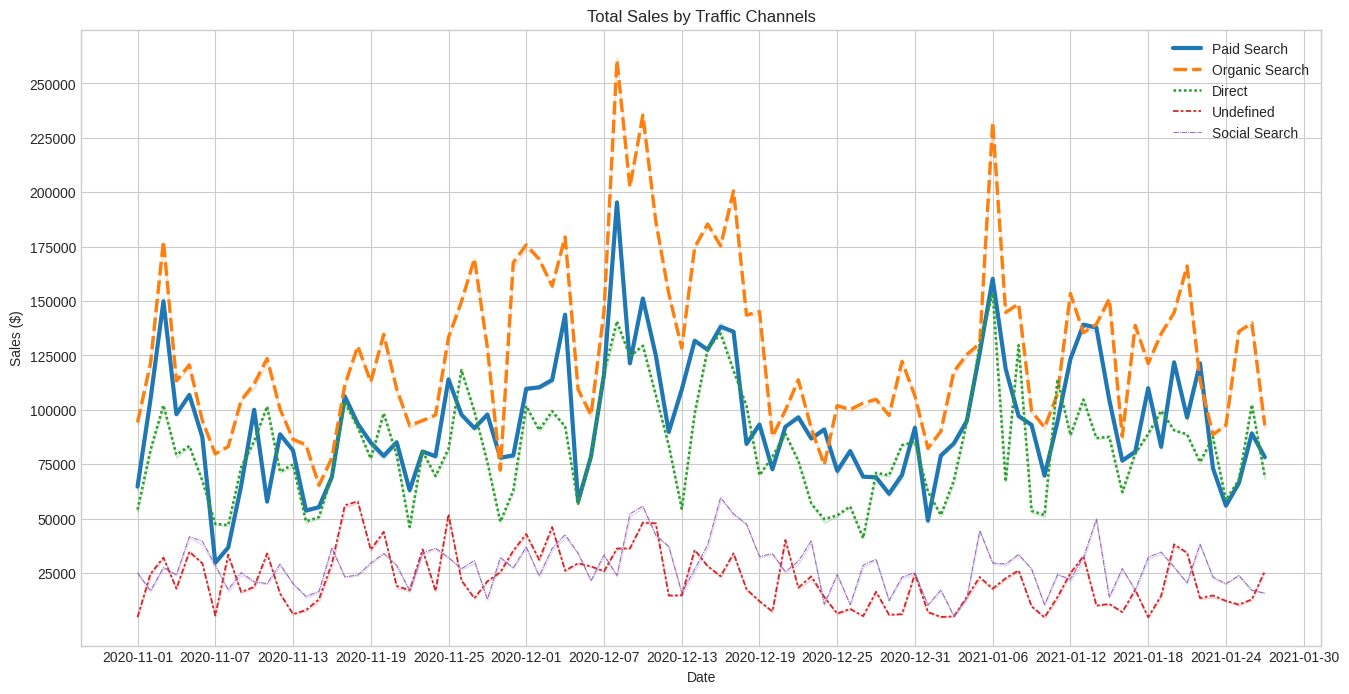

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_filtered, x="date",
             y="price",
             estimator="sum",
             hue="channel",
             errorbar=('ci', False),
             size="channel",
             style="channel")

x_ticks = np.arange(df["date"].min(), df["date"].max(), 6)
plt.xticks(x_ticks)

y_ticks = np.arange(25000, plt.gca().get_ylim()[1] + 5, 25000)
plt.yticks(y_ticks)

plt.title("Total Sales by Traffic Channels")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

In terms of Traffic Channels, we observe similar seasonality as in overall sales.

###Sales Dynamics by Device Type

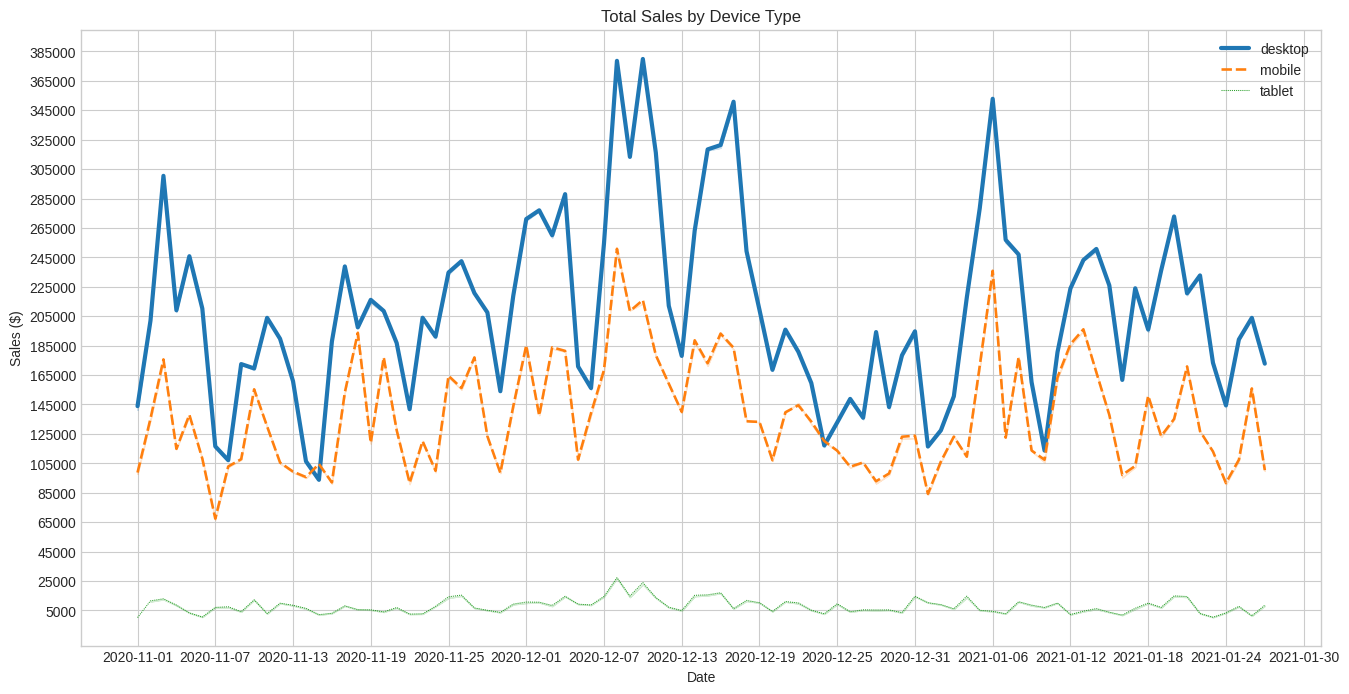

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_filtered, x="date",
             y="price",
             estimator="sum",
             hue="device",
             errorbar=('ci', False),
             size="device",
             style="device")

x_ticks = np.arange(df["date"].min(), df["date"].max(), 6)
plt.xticks(x_ticks)

y_ticks = np.arange(5000, plt.gca().get_ylim()[1] + 5, 20000)
plt.yticks(y_ticks)

plt.title("Total Sales by Device Type")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

In terms of Device Type, we observe similar seasonality as in overall sales. The highest revenue was generated by users who used computers and phones. Users who use tablets generate relatively small revenue, but it is steady and stable — without spikes or deviations.

##Pivot Tables

###Number of Sessions by Device Types and Traffic Channels

In [ ]:
number_of_session_by_channels_and_device = pd.pivot_table(df, values="session_id", index="channel", columns="device", aggfunc="count")
print(number_of_session_by_channels_and_device)

device          desktop  mobile  tablet
channel                                
Direct            47825   31745    1812
Organic Search    72622   49014    2789
Paid Search       55167   37034    2140
Social Search     16288   10988     638
Undefined         12527    8486     470


###Total Sales by Product Categories (Top 10 Categories) in Different Countries (Top 5 Countries)

In [ ]:
categories_by_total_sale = df.groupby("category")["price"].sum().sort_values(ascending=False).head(10).index.tolist()
country_by_sales_volumes = df.groupby("country")["price"].sum().sort_values(ascending=False).head(5).index.tolist()

df_filtered = df[df["category"].isin(categories_by_total_sale) & df["country"].isin(country_by_sales_volumes)]

total_filtered_sales = pd.pivot_table(df_filtered, values="price", index="category", columns="country", aggfunc="sum")
print(total_filtered_sales)

country                             Canada    France     India  \
category                                                         
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
category                                                         
Bar furniture                            22103.0       330805.0  
Beds     

##Statistical Analysis of Relationships

###Correlation between the Number of Sessions and Total Sales by each date

In [ ]:
number_of_session_by_date = df.groupby("date")["session_id"].count().reset_index(name="sessions_count")
sales_by_date = df.groupby("date")["price"].sum().reset_index(name="total_sales")

merged = pd.merge(number_of_session_by_date, sales_by_date, on="date")

print(merged)

          date  sessions_count  total_sales
0   2020-11-01            2576     244292.5
1   2020-11-02            3599     355506.8
2   2020-11-03            5173     498979.6
3   2020-11-04            4184     339187.1
4   2020-11-05            3743     391276.6
..         ...             ...          ...
87  2021-01-27            4435     286340.7
88  2021-01-28            4112          0.0
89  2021-01-29            3700          0.0
90  2021-01-30            2845          0.0
91  2021-01-31            2812          0.0

[92 rows x 3 columns]


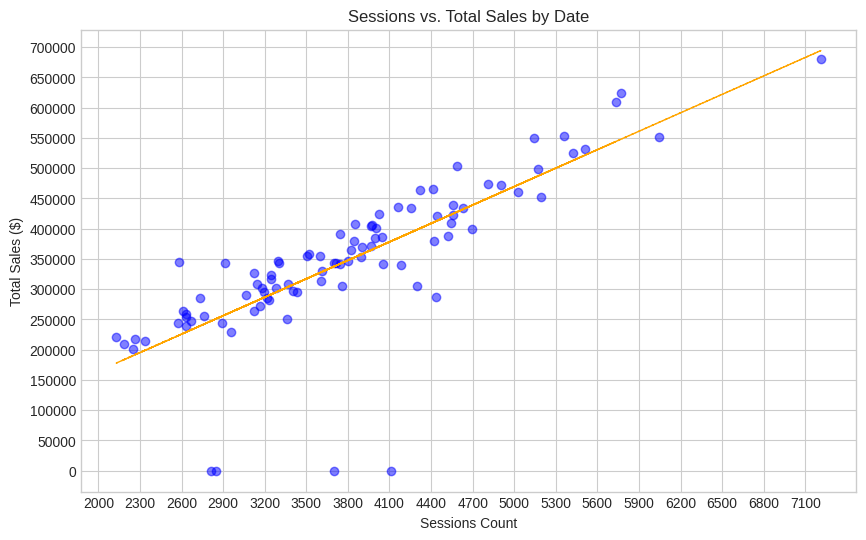

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged["sessions_count"], merged["total_sales"], color="blue", alpha=0.5)

z = np.polyfit(merged["sessions_count"], merged["total_sales"], 1)
p = np.poly1d(z)
plt.plot(merged["sessions_count"], p(merged["sessions_count"]), color="orange", linewidth=1, linestyle="--", label="Trend line")

x_ticks = np.arange(2000, merged["sessions_count"].max()+50, 300)
plt.xticks(x_ticks)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 50000)
plt.yticks(y_ticks)

plt.title("Sessions vs. Total Sales by Date")
plt.xlabel("Sessions Count")
plt.ylabel("Total Sales ($)")
plt.show()

Normaltest for sessions_count p-value: 0.008655428822366544
Shapiro-Wilk for sessions_count p-value: 0.026201156314308208

Normaltest for total_sales (excluding 0s) p-value: 0.007155898618108501
Shapiro-Wilk for total_sales (excluding 0s) p-value: 0.0047925668386651875



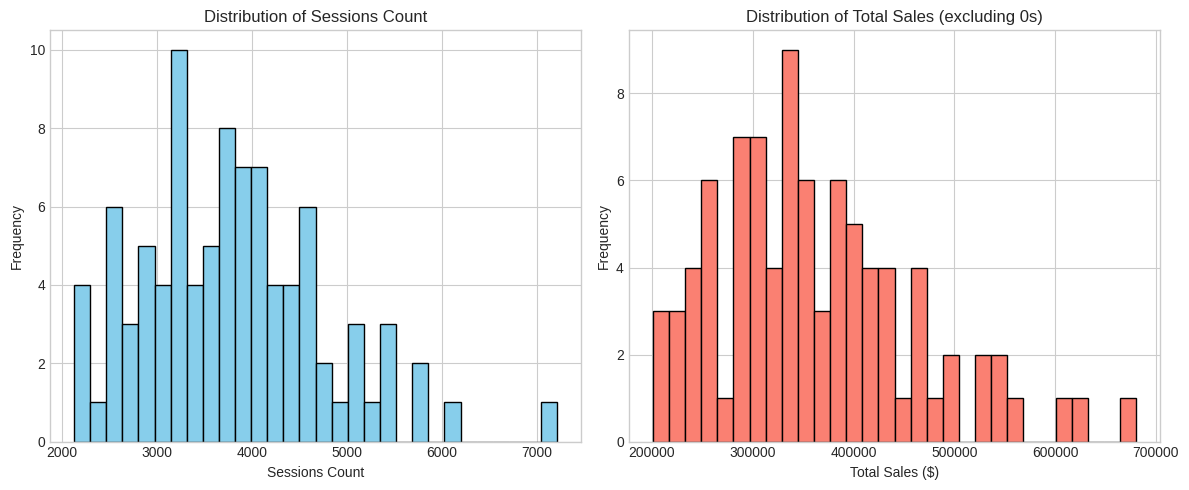

In [ ]:
from scipy.stats import normaltest, shapiro

# Normality tests for 'sessions_count'
_, p_value_sessions_normaltest = normaltest(merged['sessions_count'])
_, p_value_sessions_shapiro = shapiro(merged['sessions_count'])

# Normality tests for 'total_sales'
# Filter out rows where 'total_sales' is 0, as these might skew normality tests
# or indicate no sales for that day, which might not be part of the distribution we want to test.
merged_sales_filtered = merged[merged['total_sales'] > 0]['total_sales']
_, p_value_sales_normaltest = normaltest(merged_sales_filtered)
_, p_value_sales_shapiro = shapiro(merged_sales_filtered)

# Test results
print(f"Normaltest for sessions_count p-value: {p_value_sessions_normaltest}")
print(f"Shapiro-Wilk for sessions_count p-value: {p_value_sessions_shapiro}\n")

print(f"Normaltest for total_sales (excluding 0s) p-value: {p_value_sales_normaltest}")
print(f"Shapiro-Wilk for total_sales (excluding 0s) p-value: {p_value_sales_shapiro}\n")

# Plotting histograms to visualize data distributions
plt.figure(figsize=(12, 5))

# Histogram for sessions_count
plt.subplot(1, 2, 1)
plt.hist(merged['sessions_count'], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Sessions Count")
plt.xlabel("Sessions Count")
plt.ylabel("Frequency")

# Histogram for total_sales
plt.subplot(1, 2, 2)
plt.hist(merged_sales_filtered, bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Total Sales (excluding 0s)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Calculate p-value
print(
    f"Test statistic and p-value: {spearmanr(merged["sessions_count"], merged["total_sales"])}"
)

# Calculate Spearman correlation
spearman_corr = merged["sessions_count"].corr(
    merged["total_sales"], method="spearman"
)
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.8653062174563682), pvalue=np.float64(9.755923586156614e-29))
Spearman Correlation: 0.8653062174563682


* From the scatter plot, we see a direct relationship between the number of sessions and total sales — the more sessions, the higher the sales.
* Based on normality calculations of the sample and its graphical representation, we observe that our sample is not normally distributed, so we used Spearman's method to calculate the correlation coefficient.
* From the method's calculations, we conclude that the results of our values are statistically significant.
* The Spearman coefficient is approximately 0.87, which indicates an almost perfect positive correlation.

###Correlation between Sales on the Top 3 Continents

In [ ]:
continent_by_sales_volume = df.groupby("continent")["price"].sum().sort_values(ascending=False).head(3).index.tolist()
df_filtered1 = df[df["continent"].isin(continent_by_sales_volume)]

total_filtered1_sales = pd.pivot_table(df_filtered1, values="price", index="date", columns="continent", aggfunc="sum").reset_index()
print(total_filtered1_sales)

continent        date  Americas      Asia   Europe
0          2020-11-01  132002.5   63823.0  46908.0
1          2020-11-02  193861.0   79370.0  75710.8
2          2020-11-03  294529.8  126737.8  67692.0
3          2020-11-04  200009.5   66602.0  65915.0
4          2020-11-05  182988.2  117608.4  86540.0
..                ...       ...       ...      ...
87         2021-01-27  166735.5   66783.1  48156.1
88         2021-01-28       0.0       0.0      0.0
89         2021-01-29       0.0       0.0      0.0
90         2021-01-30       0.0       0.0      0.0
91         2021-01-31       0.0       0.0      0.0

[92 rows x 4 columns]


Normaltest for Americas sales (excluding 0s) p-value: 0.05795014942671144
Shapiro-Wilk for Americas sales (excluding 0s) p-value: 0.042468562628999736



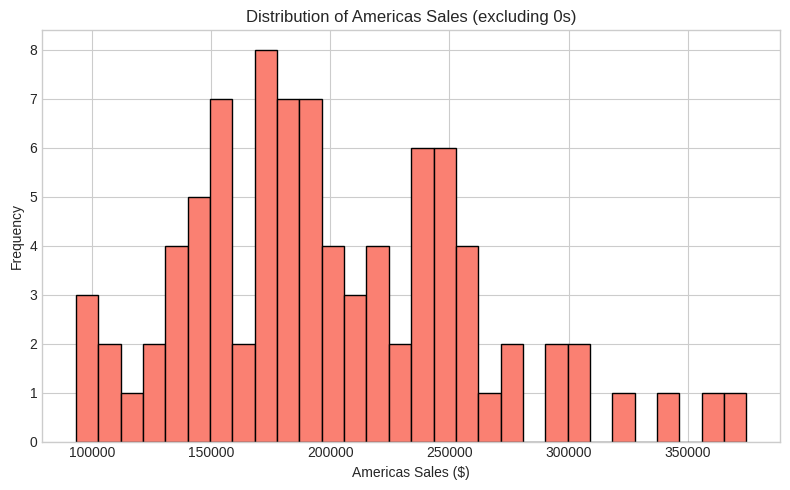

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro

# Normality tests for 'Americas' sales
# Filter out rows where 'Americas' sales are 0, as these might skew normality tests
# or indicate no sales for that day, which might not be part of the distribution we want to test.
americas_sales_filtered = total_filtered1_sales[total_filtered1_sales['Americas'] > 0]['Americas']
stat_americas_normaltest, p_value_americas_normaltest = normaltest(americas_sales_filtered)
stat_americas_shapiro, p_value_americas_shapiro = shapiro(americas_sales_filtered)

# Test results
print(f"Normaltest for Americas sales (excluding 0s) p-value: {p_value_americas_normaltest}")
print(f"Shapiro-Wilk for Americas sales (excluding 0s) p-value: {p_value_americas_shapiro}\n")

# Plotting histogram to visualize data distribution for Americas sales
plt.figure(figsize=(8, 5))

plt.hist(americas_sales_filtered, bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Americas Sales (excluding 0s)")
plt.xlabel("Americas Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Normaltest for Asia sales (excluding 0s) p-value: 0.017908999071036248
Shapiro-Wilk for Asia sales (excluding 0s) p-value: 0.0003820857396580246



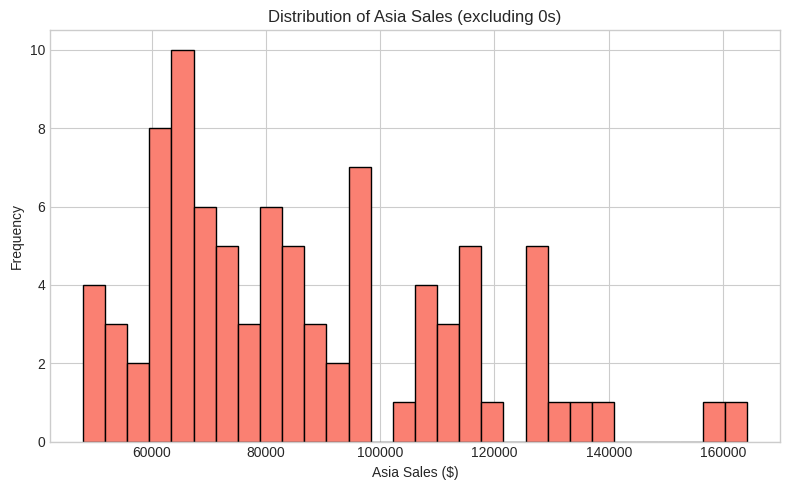

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro

# Normality tests for 'Asia' sales
# Filter out rows where 'Asia' sales are 0, as these might skew normality tests
# or indicate no sales for that day, which might not be part of the distribution we want to test.
asia_sales_filtered = total_filtered1_sales[total_filtered1_sales['Asia'] > 0]['Asia']
stat_asia_normaltest, p_value_asia_normaltest = normaltest(asia_sales_filtered)
stat_asia_shapiro, p_value_asia_shapiro = shapiro(asia_sales_filtered)

# Test results
print(f"Normaltest for Asia sales (excluding 0s) p-value: {p_value_asia_normaltest}")
print(f"Shapiro-Wilk for Asia sales (excluding 0s) p-value: {p_value_asia_shapiro}\n")

# Plotting histogram to visualize data distribution for Asia sales
plt.figure(figsize=(8, 5))

plt.hist(asia_sales_filtered, bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Asia Sales (excluding 0s)")
plt.xlabel("Asia Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Normaltest for Europe sales (excluding 0s) p-value: 0.002457815575210439
Shapiro-Wilk for Europe sales (excluding 0s) p-value: 0.007309892924070338



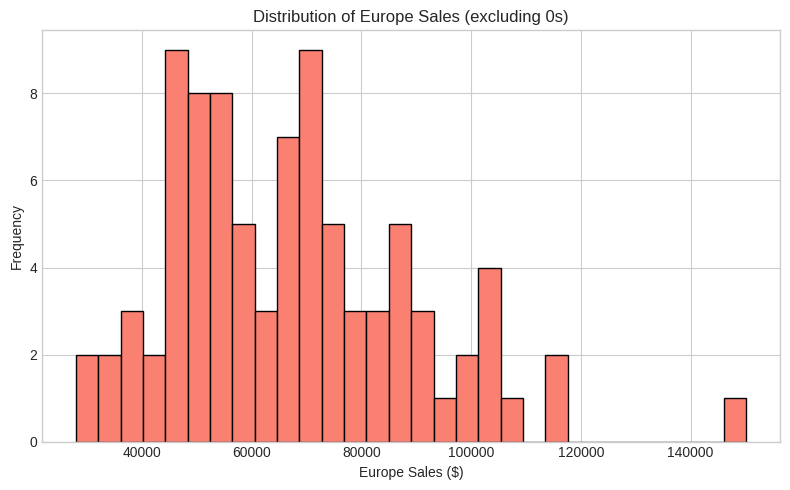

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro

# Normality tests for 'Europe' sales
# Filter out rows where 'Europe' sales are 0, as these might skew normality tests
# or indicate no sales for that day, which might not be part of the distribution we want to test.
europe_sales_filtered = total_filtered1_sales[total_filtered1_sales['Europe'] > 0]['Europe']
stat_europe_normaltest, p_value_europe_normaltest = normaltest(europe_sales_filtered)
stat_europe_shapiro, p_value_europe_shapiro = shapiro(europe_sales_filtered)

# Test results
print(f"Normaltest for Europe sales (excluding 0s) p-value: {p_value_europe_normaltest}")
print(f"Shapiro-Wilk for Europe sales (excluding 0s) p-value: {p_value_europe_shapiro}\n")

# Plotting histogram to visualize data distribution for Europe sales
plt.figure(figsize=(8, 5))

plt.hist(europe_sales_filtered, bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Europe Sales (excluding 0s)")
plt.xlabel("Europe Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

data = total_filtered1_sales[["Americas", "Asia", "Europe"]]
corr_matrix, p_values = spearmanr(data)
# Calculate p-value
print(f"Test statistic and p-value: {p_values}")

print(f"Spearman Correlation: {corr_matrix}")

Test statistic and p-value: [[0.00000000e+00 2.32337963e-15 2.10355887e-13]
 [2.32337963e-15 0.00000000e+00 1.12909472e-12]
 [2.10355887e-13 1.12909472e-12 0.00000000e+00]]
Spearman Correlation: [[1.         0.70990166 0.67257005]
 [0.70990166 1.         0.65711027]
 [0.67257005 0.65711027 1.        ]]


In [ ]:
corr_rounded = np.round(corr_matrix, 3)
pval_rounded = np.round(p_values, 3)

corr_df = pd.DataFrame(corr_rounded, index=data.columns, columns=data.columns)
pval_df = pd.DataFrame(pval_rounded, index=data.columns, columns=data.columns)

print("Spearman Correlation Matrix:")
print(corr_df)

Spearman Correlation Matrix:
continent  Americas   Asia  Europe
continent                         
Americas      1.000  0.710   0.673
Asia          0.710  1.000   0.657
Europe        0.673  0.657   1.000


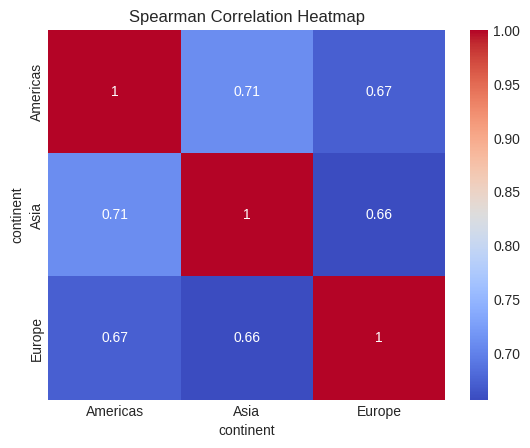

In [ ]:
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()

* Based on the normality calculations of the sample and its graphical representation, we see that our sample is not normally distributed, so we used Spearman's method to calculate the correlation coefficient.
*From the method's calculations, we conclude that the results are statistically significant.
* From the graph, the following conclusions can be drawn about the correlation between the top 3 continents by sales:
1. Americas — Asia: 0.8, Strong positive correlation. Sales in the Americas and Asia increase and decrease approximately together.
2.  Americas — Europe: 0.47, Weak to moderate correlation. There is a connection, but it is not very strong.
3.  Asia — Europe: 0.48, Similarly, moderate correlation. Asia and Europe are not as synchronized as Asia and America.

###Correlation between Sales across different Traffic Channels

In [ ]:
channels_by_sales_volume = df.groupby("channel")["price"].sum().sort_values(ascending=False).index.tolist()
df_filtered2 = df[df["channel"].isin(channels_by_sales_volume)]

total_filtered2_sales = pd.pivot_table(df_filtered2, values="price", index="date", columns="channel", aggfunc="sum").reset_index()
print(total_filtered2_sales)

channel        date    Direct  Organic Search  Paid Search  Social Search  \
0        2020-11-01   54669.5         95112.0      64688.0        25078.0   
1        2020-11-02   81561.5        127746.5     104780.8        16843.0   
2        2020-11-03  102909.5        182521.9     152641.3        27652.5   
3        2020-11-04   79683.6        117067.1     100332.0        24257.4   
4        2020-11-05   83367.6        122938.4     107648.0        41693.2   
..              ...       ...             ...          ...            ...   
87       2021-01-27   70423.1         92921.1      80869.5        16282.0   
88       2021-01-28       0.0             0.0          0.0            0.0   
89       2021-01-29       0.0             0.0          0.0            0.0   
90       2021-01-30       0.0             0.0          0.0            0.0   
91       2021-01-31       0.0             0.0          0.0            0.0   

channel  Undefined  
0           4745.0  
1          24575.0  
2          3

In [ ]:
from scipy.stats import spearmanr

data1 = total_filtered2_sales[["Direct", "Organic Search", "Paid Search", "Social Search", "Undefined"]]
corr_matrix, p_values = spearmanr(data1)
# Calculate p-value
print(f"Test statistic and p-value: {p_values}")

print(f"Spearman Correlation: {corr_matrix}")

Test statistic and p-value: [[0.00000000e+00 5.40525398e-20 1.65402162e-16 2.36555639e-06
  8.15616674e-09]
 [5.40525398e-20 0.00000000e+00 4.16183655e-21 3.64521407e-06
  7.93521774e-08]
 [1.65402162e-16 4.16183655e-21 0.00000000e+00 6.05888808e-07
  8.42190266e-09]
 [2.36555639e-06 3.64521407e-06 6.05888808e-07 0.00000000e+00
  3.45322874e-06]
 [8.15616674e-09 7.93521774e-08 8.42190266e-09 3.45322874e-06
  0.00000000e+00]]
Spearman Correlation: [[1.         0.77966337 0.72936897 0.46934246 0.55692222]
 [0.77966337 1.         0.79338142 0.4615432  0.52467709]
 [0.72936897 0.79338142 1.         0.49272481 0.55649064]
 [0.46934246 0.4615432  0.49272481 1.         0.46252967]
 [0.55692222 0.52467709 0.55649064 0.46252967 1.        ]]


In [ ]:
corr_rounded = np.round(corr_matrix, 5)

corr_df = pd.DataFrame(corr_rounded, index=data1.columns, columns=data1.columns)

print("Spearman Correlation Matrix:")
print(corr_df)

Spearman Correlation Matrix:
channel          Direct  Organic Search  Paid Search  Social Search  Undefined
channel                                                                       
Direct          1.00000         0.77966      0.72937        0.46934    0.55692
Organic Search  0.77966         1.00000      0.79338        0.46154    0.52468
Paid Search     0.72937         0.79338      1.00000        0.49272    0.55649
Social Search   0.46934         0.46154      0.49272        1.00000    0.46253
Undefined       0.55692         0.52468      0.55649        0.46253    1.00000


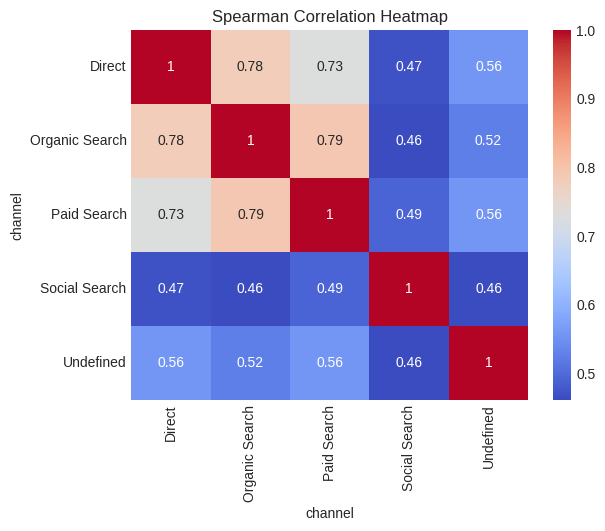

In [ ]:
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()


* Based on the normality calculations of the sample, we see that our sample is not normally distributed, so we used Spearman's method to calculate the correlation coefficient.
* From the method's calculations, we conclude that the results are statistically significant.
* From the graph, the following conclusions can be drawn about the correlation between traffic channels:
1. Direct — Organic Search (0.78) Strong positive correlation. This means that when traffic or sales from Organic increase, Direct also increases significantly, and vice versa.
2. Organic Search — Paid Search (0.79) One of the strongest correlations on the chart. This means that when traffic or sales from Organic increase, Paid Search also increases significantly, and vice versa.
3. Direct — Paid Search (0.73) Again, a strong connection.
4. Social Search — all others (0.46–0.49). Weak to moderate correlation. Social channels behave independently of search/direct channels.
5. Undefined — (0.52–0.56). “Undefined” correlates moderately with all channels.

###Correlation between Sales on the Top 5 Categoties

In [ ]:
categories_by_sales_volume = df.groupby("category")["price"].sum().sort_values(ascending=False).head(5).index.tolist()
df_filtered3 = df[df["category"].isin(categories_by_sales_volume)]

total_filtered3_sales = pd.pivot_table(df_filtered3, values="price", index="date", columns="category", aggfunc="sum").reset_index()
print(total_filtered3_sales)

category        date     Beds  Bookcases & shelving units  \
0         2020-11-01  14041.0                     36701.0   
1         2020-11-02  79683.5                     40979.0   
2         2020-11-03  66219.5                     64360.1   
3         2020-11-04  48939.0                     35719.8   
4         2020-11-05  23449.0                     40998.8   
..               ...      ...                         ...   
83        2021-01-23  37116.0                     29862.7   
84        2021-01-24  23294.0                     25396.0   
85        2021-01-25  47303.5                     25919.6   
86        2021-01-26  69894.5                     39119.2   
87        2021-01-27  43080.0                     33874.2   

category  Cabinets & cupboards   Chairs  Sofas & armchairs  
0                      13591.5  46006.0            75216.0  
1                      21623.0  58834.0            79977.5  
2                      33555.5  61204.0           175594.0  
3                      

In [ ]:
from scipy.stats import spearmanr

data2 = total_filtered3_sales[["Beds", "Bookcases & shelving units", "Cabinets & cupboards", "Chairs", "Sofas & armchairs"]]
corr_matrix, p_values = spearmanr(data2)
print(f"Test statistic and p-value: {p_values}")

print(f"Spearman Correlation: {corr_matrix}")

Test statistic and p-value: [[0.00000000e+00 4.69083172e-08 1.75878304e-05 7.91341555e-08
  1.86436772e-07]
 [4.69083172e-08 0.00000000e+00 1.19061296e-07 2.58543758e-11
  7.18899090e-11]
 [1.75878304e-05 1.19061296e-07 0.00000000e+00 1.34491526e-07
  4.32290827e-11]
 [7.91341555e-08 2.58543758e-11 1.34491526e-07 0.00000000e+00
  2.46282006e-09]
 [1.86436772e-07 7.18899090e-11 4.32290827e-11 2.46282006e-09
  0.00000000e+00]]
Spearman Correlation: [[1.         0.54274242 0.44036843 0.53494065 0.52171463]
 [0.54274242 1.         0.52870628 0.63675108 0.62560318]
 [0.44036843 0.52870628 1.         0.52682188 0.63120355]
 [0.53494065 0.63675108 0.52682188 1.         0.58331866]
 [0.52171463 0.62560318 0.63120355 0.58331866 1.        ]]


In [ ]:
corr_rounded = np.round(corr_matrix, 3)

corr_df1 = pd.DataFrame(corr_rounded, index=data2.columns, columns=data2.columns)

print("Spearman Correlation Matrix:")
print(corr_df1)

Spearman Correlation Matrix:
category                     Beds  Bookcases & shelving units  \
category                                                        
Beds                        1.000                       0.543   
Bookcases & shelving units  0.543                       1.000   
Cabinets & cupboards        0.440                       0.529   
Chairs                      0.535                       0.637   
Sofas & armchairs           0.522                       0.626   

category                    Cabinets & cupboards  Chairs  Sofas & armchairs  
category                                                                     
Beds                                       0.440   0.535              0.522  
Bookcases & shelving units                 0.529   0.637              0.626  
Cabinets & cupboards                       1.000   0.527              0.631  
Chairs                                     0.527   1.000              0.583  
Sofas & armchairs                          0.63

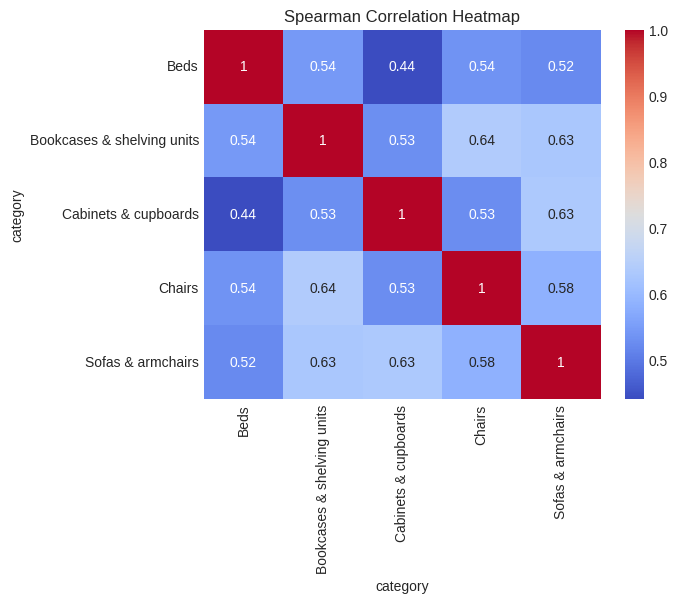

In [ ]:
sns.heatmap(corr_df1, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()

* Based on the normality calculations of the sample, we see that our sample is not normally distributed, so we used Spearman's method to calculate the correlation coefficient.
* From the method's calculations, we conclude that the results are statistically significant.
* No category has a very low correlation → the entire assortment moves more or less coherently.

---

1. The strongest cluster: “Soft Furniture + Shelves”:
* Bookcases & shelving units ↔ Chairs (0.64)
* Bookcases & shelving units ↔ Sofas & armchairs (0.63)
* Cabinets & cupboards ↔ Sofas & armchairs (0.63)
These categories show the greatest consistency in sales.
---
2. Beds — the least integrated category
* Correlations with others: 0.44–0.54, lower than the others.
Beds are bought less often, are chosen for a longer time, and are more of a separate purchase, not a group one.
---
3. Chairs — the most “connected” category
* Chairs have high correlations with all: 0.53–0.64.
This is a versatile category, often purchased together with others.
---
4. Cabinets & cupboards — bridge between segments
* Correlations 0.53–0.63 (quite stable).
They are sold both with soft furniture and with shelves.

###Correlation between Average Check and Number of Sessions

In [ ]:
number_of_session_by_date = df.groupby("date")["session_id"].count().reset_index(name="sessions_count")
sales_by_date = df.groupby("date")["price"].sum().reset_index(name="total_sales")

merged = pd.merge(number_of_session_by_date, sales_by_date, on="date")
merged["average_bill"] = round((merged["total_sales"] / merged["sessions_count"]), 2)

print(merged)

          date  sessions_count  total_sales  average_bill
0   2020-11-01            2576     244292.5         94.83
1   2020-11-02            3599     355506.8         98.78
2   2020-11-03            5173     498979.6         96.46
3   2020-11-04            4184     339187.1         81.07
4   2020-11-05            3743     391276.6        104.54
..         ...             ...          ...           ...
87  2021-01-27            4435     286340.7         64.56
88  2021-01-28            4112          0.0           0.0
89  2021-01-29            3700          0.0           0.0
90  2021-01-30            2845          0.0           0.0
91  2021-01-31            2812          0.0           0.0

[92 rows x 4 columns]


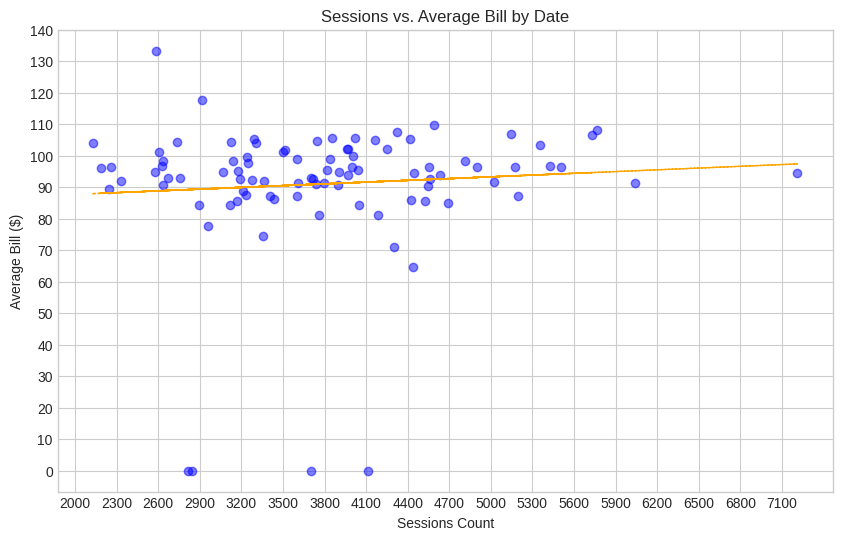

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged["sessions_count"], merged["average_bill"], color="blue", alpha=0.5)

z = np.polyfit(merged["sessions_count"], merged["average_bill"], 1)
p = np.poly1d(z)
plt.plot(merged["sessions_count"], p(merged["sessions_count"]), color="orange", linewidth=1, linestyle="--", label="Trend line")

x_ticks = np.arange(2000, merged["sessions_count"].max()+50, 300)
plt.xticks(x_ticks)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 10)
plt.yticks(y_ticks)

plt.title("Sessions vs. Average Bill by Date")
plt.xlabel("Sessions Count")
plt.ylabel("Average Bill ($)")
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Calculate p-value
print(
    f"Test statistic and p-value: {spearmanr(merged["sessions_count"], merged["average_bill"])}"
)

# Calculate Spearman correlation
spearman_corr = merged["sessions_count"].corr(
    merged["average_bill"], method="spearman"
)
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.0792074630510247), pvalue=np.float64(0.45293915390085426))
Spearman Correlation: 0.0792074630510247


* From the scatter plot, we see that there is no direct relationship between the average purchase check and the number of sales.
* Based on the calculations, we conclude that the result of our values is not statistically significant.

###Correlation between Sales across Different Devices

In [ ]:
devices_by_sales_volume = df.groupby("device")["price"].sum().sort_values(ascending=False).index.tolist()
df_filtered3 = df[df["device"].isin(devices_by_sales_volume)]

total_filtered3_sales = pd.pivot_table(df_filtered3, values="price", index="date", columns="device", aggfunc="sum").reset_index()
print(total_filtered3_sales)

device        date   desktop    mobile   tablet
0       2020-11-01  144445.0   99698.5    149.0
1       2020-11-02  206727.3  137269.5  11510.0
2       2020-11-03  304473.8  180602.8  13903.0
3       2020-11-04  212227.7  118324.4   8635.0
4       2020-11-05  249682.0  138256.0   3338.6
..             ...       ...       ...      ...
87      2021-01-27  173453.5  102042.2  10845.0
88      2021-01-28       0.0       0.0      0.0
89      2021-01-29       0.0       0.0      0.0
90      2021-01-30       0.0       0.0      0.0
91      2021-01-31       0.0       0.0      0.0

[92 rows x 4 columns]


In [ ]:
from scipy.stats import spearmanr

data2 = total_filtered3_sales[["desktop", "mobile", "tablet"]]
corr_matrix, p_values = spearmanr(data2)
# Calculate p-value
print(f"Test statistic and p-value: {p_values}")

print(f"Spearman Correlation: {corr_matrix}")

Test statistic and p-value: [[0.00000000e+00 1.40840273e-21 2.79414412e-06]
 [1.40840273e-21 0.00000000e+00 1.60987781e-06]
 [2.79414412e-06 1.60987781e-06 0.00000000e+00]]
Spearman Correlation: [[1.         0.79888406 0.46636173]
 [0.79888406 1.         0.47612625]
 [0.46636173 0.47612625 1.        ]]


In [ ]:
corr_rounded = np.round(corr_matrix, 3)

corr_df1 = pd.DataFrame(corr_rounded, index=data2.columns, columns=data2.columns)

print("Spearman Correlation Matrix:")
print(corr_df1)

Spearman Correlation Matrix:
device   desktop  mobile  tablet
device                          
desktop    1.000   0.799   0.466
mobile     0.799   1.000   0.476
tablet     0.466   0.476   1.000


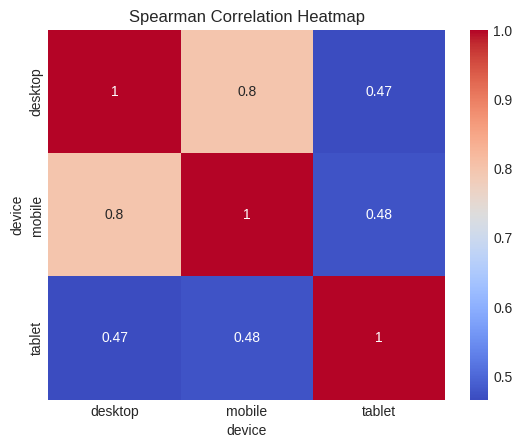

In [ ]:
sns.heatmap(corr_df1, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()


* From the calculations, we conclude that our results are statistically significant.

Device correlations:
* desktop-mobile (0.8): Strong positive correlation. Sales/traffic from desktop and mobile are synchronized: if there is more on one device, there tends to be more on the other as well.
* desktop-tablet (0.47) and mobile-tablet (0.48): Moderate correlation. Tablet behaves less consistently with desktop or mobile, but there is some connection.
---
This means desktop and mobile sales trends move closely together, while tablet performance is more independent but still shows some moderate alignment with the other devices.

##Statistical analysis of differences between groups

###Statistical Analysis of Sales differences between Registered and Unregistered User groups by Date

In [ ]:
registred_acc = df[df["id_account"].notnull()]
reg_acc_sales = registred_acc.groupby("date")["price"].sum().reset_index(name="total_sales_by_registred_acc")

print(reg_acc_sales)

          date  total_sales_by_registred_acc
0   2020-11-01                       21547.0
1   2020-11-02                       44956.8
2   2020-11-03                       29150.5
3   2020-11-04                       20982.2
4   2020-11-05                       25334.6
..         ...                           ...
83  2021-01-23                       16117.0
84  2021-01-24                       20914.0
85  2021-01-25                       34163.8
86  2021-01-26                       27213.6
87  2021-01-27                       14613.6

[88 rows x 2 columns]


In [ ]:
not_registed_acc = df[df["id_account"].isnull()]
not_reg_acc_sales = not_registed_acc.groupby("date")["price"].sum().reset_index(name="total_sales_by_not_registred_acc")

print(not_reg_acc_sales)

          date  total_sales_by_not_registred_acc
0   2020-11-01                          222745.5
1   2020-11-02                          310550.0
2   2020-11-03                          469829.1
3   2020-11-04                          318204.9
4   2020-11-05                          365942.0
..         ...                               ...
87  2021-01-27                          271727.1
88  2021-01-28                               0.0
89  2021-01-29                               0.0
90  2021-01-30                               0.0
91  2021-01-31                               0.0

[92 rows x 2 columns]


In [ ]:
merged_sales = pd.merge(reg_acc_sales, not_reg_acc_sales, how="outer", on="date")
print(merged_sales)

          date  total_sales_by_registred_acc  total_sales_by_not_registred_acc
0   2020-11-01                       21547.0                          222745.5
1   2020-11-02                       44956.8                          310550.0
2   2020-11-03                       29150.5                          469829.1
3   2020-11-04                       20982.2                          318204.9
4   2020-11-05                       25334.6                          365942.0
..         ...                           ...                               ...
87  2021-01-27                       14613.6                          271727.1
88  2021-01-28                           NaN                               0.0
89  2021-01-29                           NaN                               0.0
90  2021-01-30                           NaN                               0.0
91  2021-01-31                           NaN                               0.0

[92 rows x 3 columns]


Normaltest for Registred Users p-value: 0.010929121653065912
Shapiro-Wilk for Registred Users p-value: 0.007295139880540744

Normaltest for Not Registred Users p-value: 0.005566190512660351
Shapiro-Wilk for Not Registred Users p-value: 0.0026183359245325936



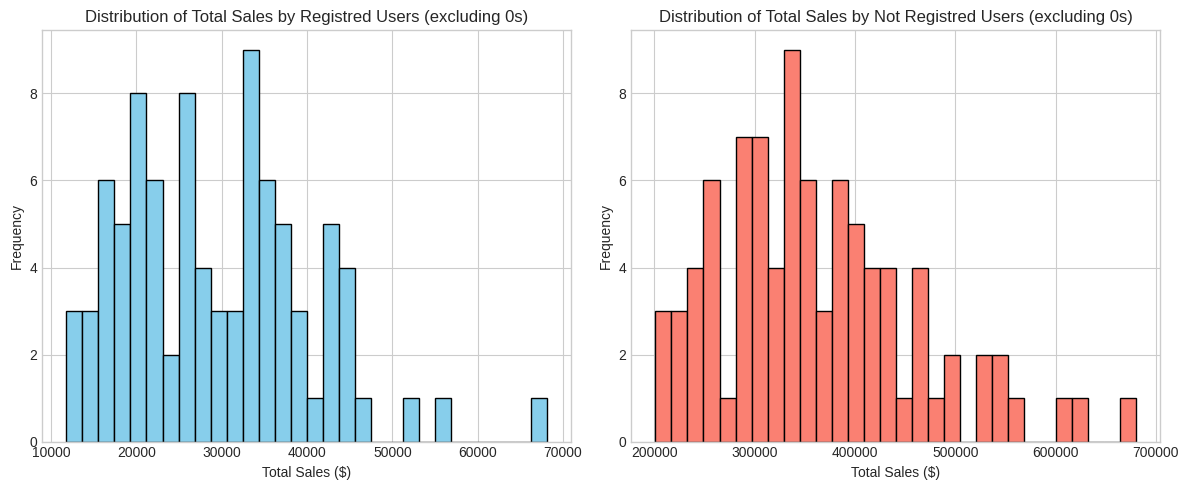

In [ ]:
from scipy.stats import normaltest, shapiro

# Normality tests for 'registred_acc'
merged_sales_filtered1 = merged_sales[merged_sales['total_sales_by_registred_acc'] > 0]['total_sales_by_registred_acc']
_, p_value_sales_registred_acc_normaltest = normaltest(merged_sales_filtered1)
_, p_value_sales_registred_acc_shapiro = shapiro(merged_sales_filtered1)

# Normality tests for 'not_registred_acc'
merged_sales_filtered2 = merged_sales[merged_sales['total_sales_by_not_registred_acc'] > 0]['total_sales_by_not_registred_acc']
_, p_value_sales_not_registred_acc_normaltest = normaltest(merged_sales_filtered2)
_, p_value_sales_not_registred_acc_shapiro = shapiro(merged_sales_filtered2)

# Test results
print(f"Normaltest for Registred Users p-value: {p_value_sales_registred_acc_normaltest}")
print(f"Shapiro-Wilk for Registred Users p-value: {p_value_sales_registred_acc_shapiro}\n")

print(f"Normaltest for Not Registred Users p-value: {p_value_sales_not_registred_acc_normaltest}")
print(f"Shapiro-Wilk for Not Registred Users p-value: {p_value_sales_not_registred_acc_shapiro}\n")

# Plotting histograms to visualize data distributions
plt.figure(figsize=(12, 5))

# Histogram for registred_acc
plt.subplot(1, 2, 1)
plt.hist(merged_sales['total_sales_by_registred_acc'], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Total Sales by Registred Users (excluding 0s)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")

# Histogram for not_registred_acc
plt.subplot(1, 2, 2)
plt.hist(merged_sales_filtered, bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Total Sales by Not Registred Users (excluding 0s)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Select only the numerical sales columns and drop any NaN values
sales_registered = merged_sales['total_sales_by_registred_acc'].dropna()
sales_not_registered = merged_sales['total_sales_by_not_registred_acc'].dropna()

u_stat, p_value = mannwhitneyu(sales_registered, sales_not_registered)
print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 352.0, p-value: 3.8805185465235906e-26


* The samples are not normally distributed — neither for registered nor for unregistered users.
* To analyze the samples, we use the Mann-Whitney U test.
* The p-value is much less than 0.05, so we reject the null hypothesis of no difference between the groups. This means that there **is a statistically significant difference** in sales per date between registered and unregistered users.

###Statistical Analysis of Session Count Differences across Traffic Channels

In [ ]:
total_sessions_by_channels = pd.pivot_table(df, values="session_id", index="date", columns="channel", aggfunc="count").reset_index()
print(total_sessions_by_channels)

channel        date  Direct  Organic Search  Paid Search  Social Search  \
0        2020-11-01     608             920          706            214   
1        2020-11-02     810            1242          970            315   
2        2020-11-03    1216            1871         1367            392   
3        2020-11-04     935            1425         1145            368   
4        2020-11-05     845            1293          917            346   
..              ...     ...             ...          ...            ...   
87       2021-01-27     984            1561         1192            359   
88       2021-01-28     997            1379         1107            364   
89       2021-01-29     878            1319          988            288   
90       2021-01-30     685             989          787            218   
91       2021-01-31     644            1051          729            228   

channel  Undefined  
0              128  
1              262  
2              327  
3              

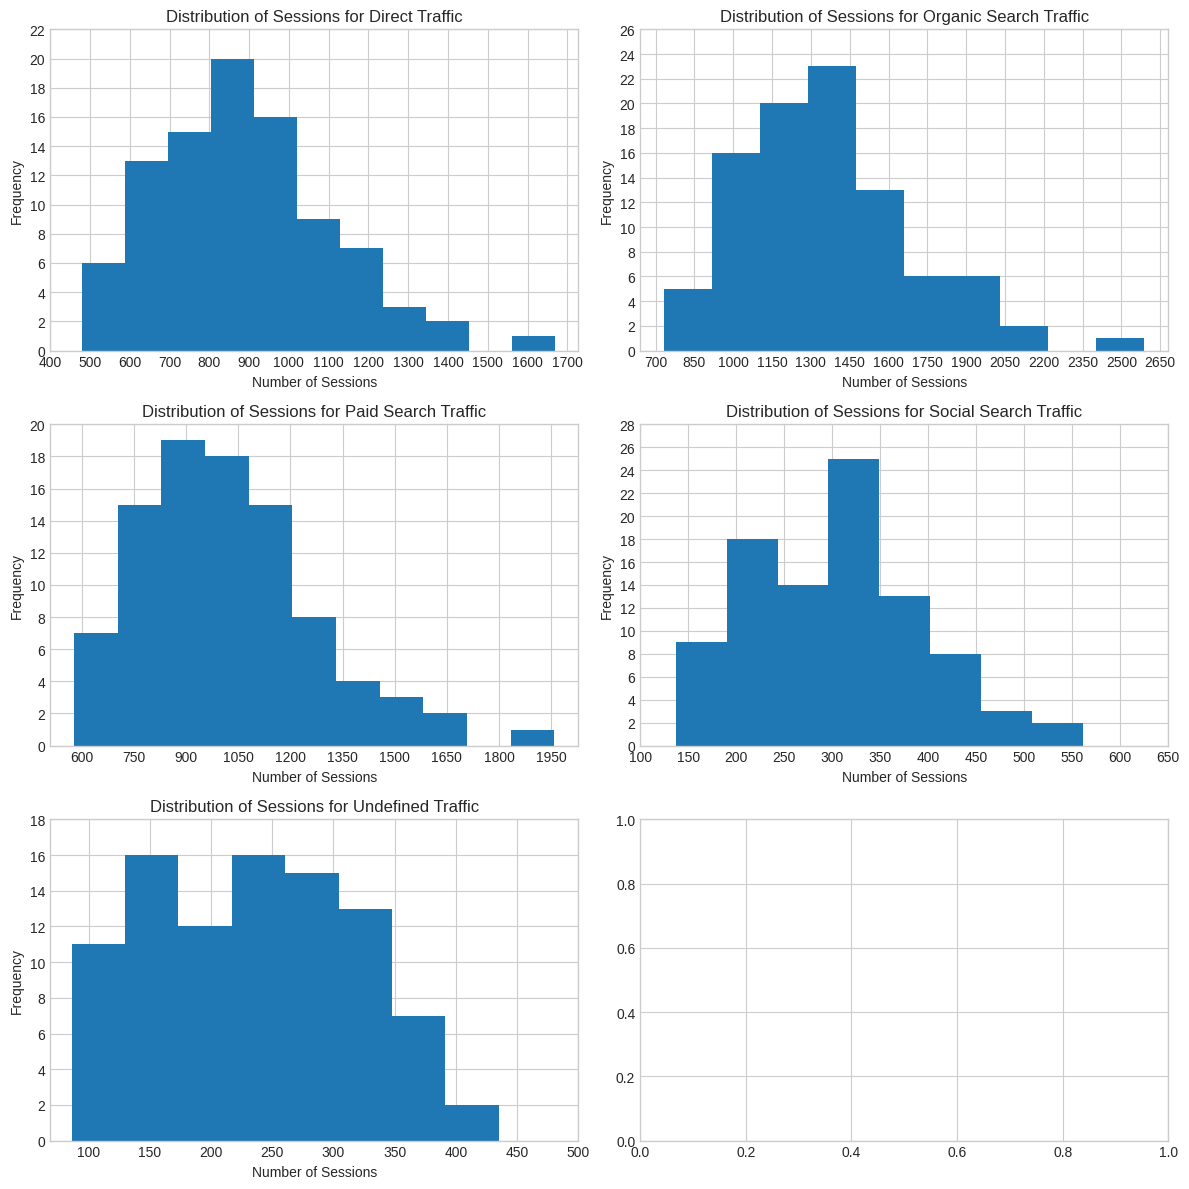

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# First subplot - Scatter plot of total_bill vs tip
ax[0, 0].hist(total_sessions_by_channels["Direct"], bins="auto")
ax[0, 0].set_title("Distribution of Sessions for Direct Traffic")
ax[0, 0].set_xlabel("Number of Sessions")
ax[0, 0].set_ylabel("Frequency")

x_ticks = np.arange(400, total_sessions_by_channels["Direct"].max() + 100, 100)
ax[0, 0].set_xticks(x_ticks)

y_ticks = np.arange(0, ax[0, 0].get_ylim()[1] + 2, 2)
ax[0, 0].set_yticks(y_ticks)

# Second subplot
ax[0, 1].hist(total_sessions_by_channels["Organic Search"], bins="auto")
ax[0, 1].set_title("Distribution of Sessions for Organic Search Traffic")
ax[0, 1].set_xlabel("Number of Sessions")
ax[0, 1].set_ylabel("Frequency")

x_ticks = np.arange(700, total_sessions_by_channels["Organic Search"].max() + 100, 150)
ax[0, 1].set_xticks(x_ticks)

y_ticks = np.arange(0, ax[0, 1].get_ylim()[1] + 2, 2)
ax[0, 1].set_yticks(y_ticks)

# Third subplot
ax[1, 0].hist(total_sessions_by_channels["Paid Search"], bins="auto")
ax[1, 0].set_title("Distribution of Sessions for Paid Search Traffic")
ax[1, 0].set_xlabel("Number of Sessions")
ax[1, 0].set_ylabel("Frequency")

x_ticks = np.arange(600, total_sessions_by_channels["Paid Search"].max() + 100, 150)
ax[1, 0].set_xticks(x_ticks)

y_ticks = np.arange(0, ax[1, 0].get_ylim()[1] + 2, 2)
ax[1, 0].set_yticks(y_ticks)

# Fourth subplot
ax[1, 1].hist(total_sessions_by_channels["Social Search"], bins="auto")
ax[1, 1].set_title("Distribution of Sessions for Social Search Traffic")
ax[1, 1].set_xlabel("Number of Sessions")
ax[1, 1].set_ylabel("Frequency")

x_ticks = np.arange(100, total_sessions_by_channels["Social Search"].max() + 100, 50)
ax[1, 1].set_xticks(x_ticks)

y_ticks = np.arange(0, ax[1, 1].get_ylim()[1] + 2, 2)
ax[1, 1].set_yticks(y_ticks)

# Fifth subplot
ax[2, 0].hist(total_sessions_by_channels["Undefined"], bins="auto")
ax[2, 0].set_title("Distribution of Sessions for Undefined Traffic")
ax[2, 0].set_xlabel("Number of Sessions")
ax[2, 0].set_ylabel("Frequency")

x_ticks = np.arange(100, total_sessions_by_channels["Undefined"].max() + 100, 50)
ax[2, 0].set_xticks(x_ticks)

y_ticks = np.arange(0, ax[2, 0].get_ylim()[1] + 2, 2)
ax[2, 0].set_yticks(y_ticks)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro

direct = total_sessions_by_channels[total_sessions_by_channels["Direct"] > 0]["Direct"]
_, p_value_direct_normaltest = normaltest(direct)
_, p_value_direct_shapiro = shapiro(direct)

print(f"Normaltest for Direct Channel p-value: {p_value_direct_normaltest}")
print(f"Shapiro-Wilk for Direct Channel p-value: {p_value_direct_shapiro}\n")

organic_search = total_sessions_by_channels[total_sessions_by_channels["Organic Search"] > 0]["Organic Search"]
_, p_value_organic_search_normaltest = normaltest(organic_search)
_, p_value_organic_search_shapiro = shapiro(organic_search)

print(f"Normaltest for Organic Search Channel p-value: {p_value_organic_search_normaltest}")
print(f"Shapiro-Wilk for Organic Search Channel p-value: {p_value_organic_search_shapiro}\n")

paid_search = total_sessions_by_channels[total_sessions_by_channels["Paid Search"] > 0]["Paid Search"]
_, p_value_paid_search_normaltest = normaltest(paid_search)
_, p_value_paid_search_shapiro = shapiro(paid_search)

print(f"Normaltest for Paid Search Channel p-value: {p_value_paid_search_normaltest}")
print(f"Shapiro-Wilk for Paid Search Channel p-value: {p_value_paid_search_shapiro}\n")

social_search = total_sessions_by_channels[total_sessions_by_channels["Social Search"] > 0]["Social Search"]
_, p_value_social_search_normaltest = normaltest(social_search)
_, p_value_social_search_shapiro = shapiro(social_search)

print(f"Normaltest for Social Search Channel p-value: {p_value_social_search_normaltest}")
print(f"Shapiro-Wilk for Social Search Channel p-value: {p_value_social_search_shapiro}\n")

undefined_channel = total_sessions_by_channels[total_sessions_by_channels["Undefined"] > 0]["Undefined"]
_, p_value_undefined_channel_normaltest = normaltest(undefined_channel)
_, p_value_undefined_channel_shapiro = shapiro(undefined_channel)

print(f"Normaltest for Undefined Channel p-value: {p_value_undefined_channel_normaltest}")
print(f"Shapiro-Wilk for Undefined Channel p-value: {p_value_undefined_channel_shapiro}\n")

Normaltest for Direct Channel p-value: 0.007853358264896217
Shapiro-Wilk for Direct Channel p-value: 0.034278771626201326

Normaltest for Organic Search Channel p-value: 0.0031046084804515037
Shapiro-Wilk for Organic Search Channel p-value: 0.012271774671209374

Normaltest for Paid Search Channel p-value: 0.0016504167955096551
Shapiro-Wilk for Paid Search Channel p-value: 0.010833125972481636

Normaltest for Social Search Channel p-value: 0.21439918696878835
Shapiro-Wilk for Social Search Channel p-value: 0.14127184979117535

Normaltest for Undefined Channel p-value: 0.0402046864129123
Shapiro-Wilk for Undefined Channel p-value: 0.054564615910193105



In [ ]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(total_sessions_by_channels["Direct"], total_sessions_by_channels["Organic Search"], total_sessions_by_channels["Paid Search"], total_sessions_by_channels["Social Search"], total_sessions_by_channels["Undefined"])

print(f"Kruskal-Wallis statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between different Traffic Channels.")
else:
    print("There is no significant difference between different Traffic Channels.")

Kruskal-Wallis statistic: 368.98057369864847
P-value: 1.397036102599359e-78
There is a significant difference between different Traffic Channels.


* Based on the results of normality tests (Normaltest and Shapiro-Wilk) for different traffic channels (except Social Search), non-parametric methods should be used due to the non-normal data distribution.
* Social Search can be considered normally distributed for further analysis using parametric methods.
* Since it is important for us to determine the dependence between all channels, we will use the Kruskal-Wallis test.
* According to the results of this test - there is a significant difference between different Traffic Channels.

###Statistical Сomparison of Organic Traffic Session Share between Europe and America

In [ ]:
organic_search_europe = df[(df["continent"].str.contains("Europe")) & (df["channel"].str.contains("Organic Search"))]
europe_number_of_session = organic_search_europe.groupby("date")["session_id"].count().reset_index(name="Europe number of session")

europe_all_channels_filter = df[(df["continent"].str.contains("Europe"))]
europe_all_channels = europe_all_channels_filter.groupby("date")["session_id"].count().reset_index(name="Europe all channels")

merged_sessions_europe = pd.merge(europe_number_of_session, europe_all_channels, how="outer", on="date")

merged_sessions_europe["Proportion of Organic Sessions"] = round((merged_sessions_europe["Europe number of session"] / merged_sessions_europe["Europe all channels"] * 100), 2)

europe_df = merged_sessions_europe[["date", "Proportion of Organic Sessions"]].copy()
europe_df["region"] = "Europe"
europe_df = europe_df.rename(columns={"Europe Proportion": "Proportion of Organic Sessions"})

print(merged_sessions_europe)

          date  Europe number of session  Europe all channels  \
0   2020-11-01                       170                  463   
1   2020-11-02                       228                  659   
2   2020-11-03                       340                  913   
3   2020-11-04                       267                  834   
4   2020-11-05                       259                  724   
..         ...                       ...                  ...   
87  2021-01-27                       280                  818   
88  2021-01-28                       249                  720   
89  2021-01-29                       248                  682   
90  2021-01-30                       184                  510   
91  2021-01-31                       205                  536   

    Proportion of Organic Sessions  
0                            36.72  
1                             34.6  
2                            37.24  
3                            32.01  
4                            35.77

In [ ]:
organic_search_americas = df[(df["continent"].str.contains("Americas")) & (df["channel"].str.contains("Organic Search"))]
americas_number_of_session = organic_search_americas.groupby("date")["session_id"].count().reset_index(name="Americas number of session")

americas_all_channels_filter = df[(df["continent"].str.contains("Americas"))]
americas_all_channels = americas_all_channels_filter.groupby("date")["session_id"].count().reset_index(name="Americas all channels")

merged_sessions_americas = pd.merge(americas_number_of_session, americas_all_channels, how="outer", on="date")

merged_sessions_americas["Proportion of Organic Sessions"] = round((merged_sessions_americas["Americas number of session"] / merged_sessions_americas["Americas all channels"] * 100), 2)

print(merged_sessions_americas)

          date  Americas number of session  Americas all channels  \
0   2020-11-01                         534                   1474   
1   2020-11-02                         654                   1968   
2   2020-11-03                         981                   2814   
3   2020-11-04                         799                   2255   
4   2020-11-05                         700                   2015   
..         ...                         ...                    ...   
87  2021-01-27                         868                   2487   
88  2021-01-28                         766                   2338   
89  2021-01-29                         725                   2027   
90  2021-01-30                         571                   1614   
91  2021-01-31                         535                   1507   

    Proportion of Organic Sessions  
0                            36.23  
1                            33.23  
2                            34.86  
3                      

Normaltest for Americas sessions p-value: 0.5047535004104708
Shapiro-Wilk for Americas sessions p-value: 0.08055762753325152

Normaltest for Europe sessions p-value: 0.24374801287485615
Shapiro-Wilk for Europe sessions p-value: 0.33613724848865983



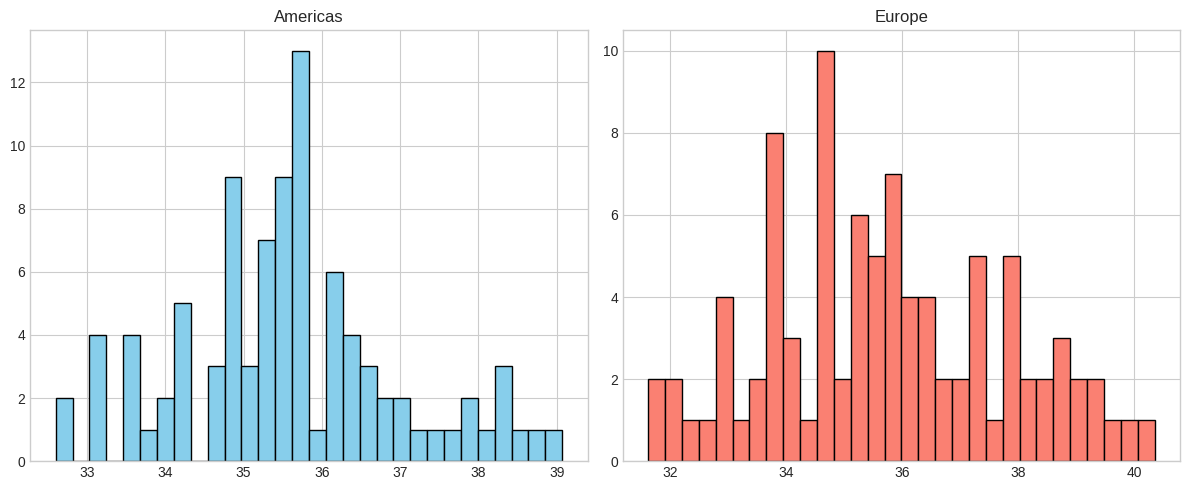

In [ ]:
from scipy.stats import normaltest, shapiro

sessions_americas = merged_sessions_americas[merged_sessions_americas["Proportion of Organic Sessions"] > 0]["Proportion of Organic Sessions"]
sessions_europe = merged_sessions_europe[merged_sessions_europe["Proportion of Organic Sessions"] > 0]["Proportion of Organic Sessions"]

# Normality tests for Americas sessions
_, p_value_americas_normaltest = normaltest(sessions_americas)
_, p_value_americas_shapiro = shapiro(sessions_americas)

print(f"Normaltest for Americas sessions p-value: {p_value_americas_normaltest}")
print(f"Shapiro-Wilk for Americas sessions p-value: {p_value_americas_shapiro}\n")

# Normality tests for Europe sessions
_, p_value_europe_normaltest = normaltest(sessions_europe)
_, p_value_europe_shapiro = shapiro(sessions_europe)

print(f"Normaltest for Europe sessions p-value: {p_value_europe_normaltest}")
print(f"Shapiro-Wilk for Europe sessions p-value: {p_value_europe_shapiro}\n")

# Plotting histograms to visualize data distributions
plt.figure(figsize=(12, 5))

# Normal distribution
plt.subplot(1, 2, 1)
plt.hist(sessions_americas, bins=30, color="skyblue", edgecolor="black")
plt.title("Americas")

# Non-normal distribution
plt.subplot(1, 2, 2)
plt.hist(sessions_europe, bins=30, color="salmon", edgecolor="black")
plt.title("Europe")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(sessions_americas, sessions_europe)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between Europe and America.")
else:
    print("There is no significant difference between Europe and America.")

t-statistic: -0.499438131027756, p-value: 0.6180739736938052
There is no significant difference between Europe and America.


* The results of normality tests for sessions in the Americas and Europe regions indicate that both exceed the 0.05 threshold, allowing us not to reject the null hypothesis and to assume that the session samples in these regions can be considered normally distributed.
* Therefore, for the analysis of these data, a t-test can be applied.
* According to the results of this test, there is a significant difference between Europe and America in Organic Traffic Session Share.

#Tableau Visualisation

This dashboard provides a comprehensive overview of user activity, sales, and engagement patterns across devices, channels, languages, and user segments. It combines traffic analysis, revenue breakdowns, and behavioral insights to help identify key trends, high-performing categories, and the impact of verification or subscription status. Interactive features and filters enable detailed exploration of the data, supporting effective business decision-making.

https://public.tableau.com/views/E-commerceUserRevenueAnalyticsDashboard/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link